In [98]:
%reset -f

In [99]:
#https://www.tensorflow.org/tutorials/images/classification
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [100]:
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_url = "c://users//giovanni.milan//documents//crack_detection_CNN_masonry//dataset//failure//dataset//"

#data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)
data_dir = pathlib.Path(dataset_url)

#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)

In [101]:
batch_size = 32
img_height = 180
img_width = 180

In [102]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = 'inferred',
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 234 files belonging to 4 classes.
Using 164 files for training.


In [103]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = 'inferred',
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 234 files belonging to 4 classes.
Using 70 files for validation.


In [104]:
class_names = train_ds.class_names
print(class_names)

['diag', 'horiz', 'step', 'vert']


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


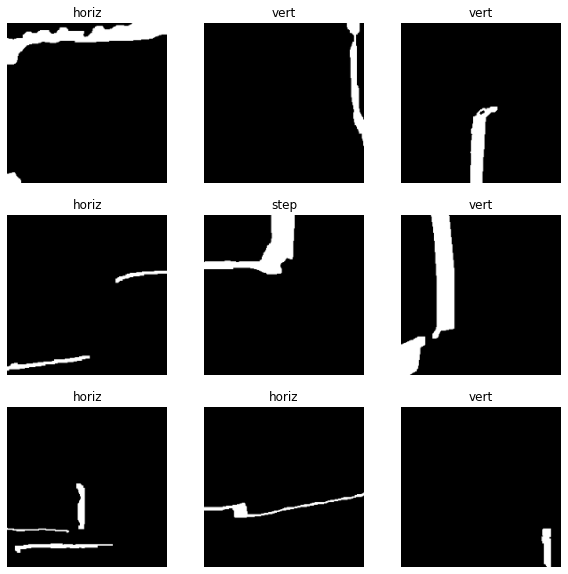

In [105]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    print(labels[i])
    plt.axis("off")

In [106]:
for image_batch, labels_batch in train_ds:
        print(image_batch.shape)
        print(labels_batch.shape)
        break

(32, 180, 180, 3)
(32,)


In [107]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [108]:
normalization_layer = layers.Rescaling(1./255)

In [109]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [110]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [111]:
num_classes = len(class_names)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [113]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 5s 592ms/step - loss: 1.3731 - accuracy: 0.4634 - val_loss: 1.2719 - val_accuracy: 0.4857
Epoch 2/10
6/6 [==============================] - 4s 649ms/step - loss: 1.2335 - accuracy: 0.4512 - val_loss: 1.2059 - val_accuracy: 0.4286
Epoch 3/10
6/6 [==============================] - 4s 803ms/step - loss: 1.1320 - accuracy: 0.5183 - val_loss: 1.3002 - val_accuracy: 0.4857
Epoch 4/10
6/6 [==============================] - 5s 821ms/step - loss: 1.1167 - accuracy: 0.5488 - val_loss: 1.2537 - val_accuracy: 0.4714
Epoch 5/10
6/6 [==============================] - 4s 747ms/step - loss: 1.0745 - accuracy: 0.5427 - val_loss: 1.2530 - val_accuracy: 0.4857
Epoch 6/10
6/6 [==============================] - 5s 894ms/step - loss: 1.0084 - accuracy: 0.5854 - val_loss: 1.1930 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 6s 1s/step - loss: 0.9712 - accuracy: 0.6280 - val_loss: 1.1488 - val_accuracy: 0.5286
Epoch 8/10
6/6 [=======

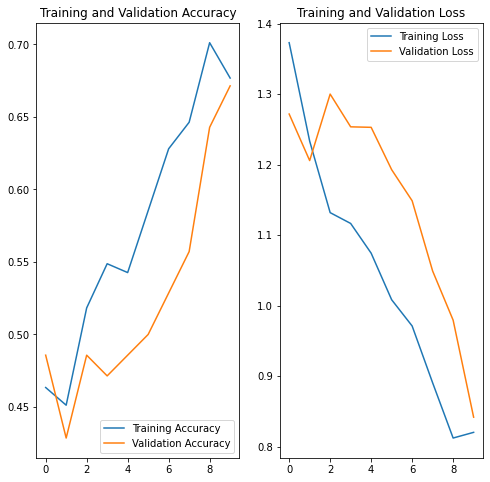

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [115]:
predictions = model.predict(val_ds)
print(len(predictions))
score = tf.nn.softmax(predictions[1])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

70
This image most likely belongs to vert with a 82.36 percent confidence.


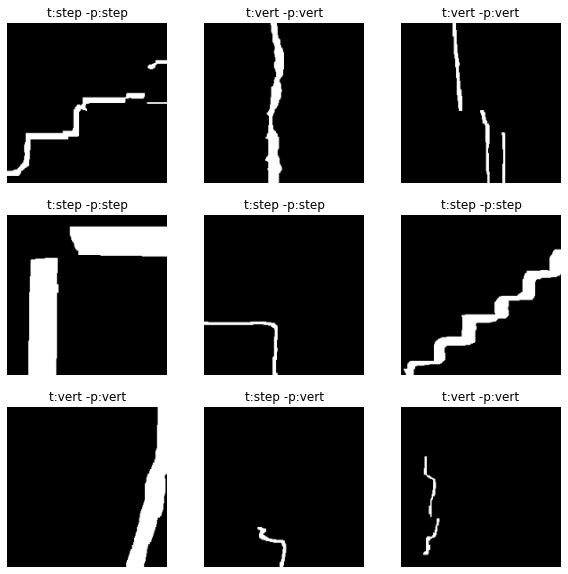

In [116]:

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    temp = tf.nn.softmax(predictions[i])
    plt.title("t:"+class_names[labels[i]]+" -p:"+class_names[np.argmax(temp)])
    #print(labels[i])
    plt.axis("off")

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(len(labels)):
    #ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    temp = tf.nn.softmax(predictions[i])
    plt.title("t:"+class_names[labels[i]]+" -p:"+class_names[np.argmax(temp)])
    #print(labels[i])
    plt.axis("off")
    plt.show()